In [1140]:
import pandas as pd
import matplotlib.pyplot as plt

In [1141]:
# read the csv-data

df_b6 = pd.read_csv("./Gro_kraftwerk_Mannheim_202402060000_202402162359_Viertelstunde-block6.csv", sep=";")
df_b9 = pd.read_csv("./Gro_kraftwerk_Mannheim_202402060000_202402162359_Viertelstunde-block9.csv", sep=";")

In [1142]:
# get an understanding about the data sets
# columns of block 6

df_b6.columns

Index(['Datum', 'Anfang', 'Ende',
       'Generation_DE GKM Block 6 [MW] Berechnete Auflösungen'],
      dtype='object')

In [1143]:
# shape of block 6

df_b6.shape

(1056, 4)

In [1144]:
# first and last rows of block 6

df_b6.head()

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen
0,06.02.2024,00:00,00:15,"1,75"
1,06.02.2024,00:15,00:30,"1,75"
2,06.02.2024,00:30,00:45,"1,75"
3,06.02.2024,00:45,01:00,"1,75"
4,06.02.2024,01:00,01:15,"1,75"


In [1145]:
# columns of block ß

df_b9.columns

Index(['Datum', 'Anfang', 'Ende',
       'Generation_DE GKM Block 9 [MW] Berechnete Auflösungen'],
      dtype='object')

In [1146]:
# shape of block 9

df_b9.shape

(1056, 4)

In [1147]:
# first and last rows of block 9

df_b9.head()

,Datum,Anfang,Ende,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen
0,06.02.2024,00:00,00:15,34
1,06.02.2024,00:15,00:30,34
2,06.02.2024,00:30,00:45,34
3,06.02.2024,00:45,01:00,34
4,06.02.2024,01:00,01:15,18


In [1148]:
# check if types are matching befor attempting to merge

print(df_b6.dtypes)
print(df_b9.dtypes)

Datum                                                    object
Anfang                                                   object
Ende                                                     object
Generation_DE GKM Block 6 [MW] Berechnete Auflösungen    object
dtype: object
Datum                                                    object
Anfang                                                   object
Ende                                                     object
Generation_DE GKM Block 9 [MW] Berechnete Auflösungen    object
dtype: object


In [1149]:
# join dataframes

df_joined = df_b6.join(df_b9.set_index(["Datum", "Anfang", "Ende"]), on=["Datum", "Anfang", "Ende"])

df_joined.head()

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen
0,06.02.2024,00:00,00:15,"1,75",34
1,06.02.2024,00:15,00:30,"1,75",34
2,06.02.2024,00:30,00:45,"1,75",34
3,06.02.2024,00:45,01:00,"1,75",34
4,06.02.2024,01:00,01:15,"1,75",18


In [1150]:
df_joined.tail()

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen
1051,16.02.2024,22:45,23:00,-,-
1052,16.02.2024,23:00,23:15,-,-
1053,16.02.2024,23:15,23:30,-,-
1054,16.02.2024,23:30,23:45,-,-
1055,16.02.2024,23:45,00:00,-,-


In [1151]:
# inspect the newly created dataframe

df_joined.columns

Index(['Datum', 'Anfang', 'Ende',
       'Generation_DE GKM Block 6 [MW] Berechnete Auflösungen',
       'Generation_DE GKM Block 9 [MW] Berechnete Auflösungen'],
      dtype='object')

In [1152]:
# data cleansing
# check for null values

df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1051    False
1052    False
1053    False
1054    False
1055    False
Name: Generation_DE GKM Block 6 [MW] Berechnete Auflösungen, Length: 1056, dtype: bool

In [1153]:
# data cleansing
# check for null values
df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1051    False
1052    False
1053    False
1054    False
1055    False
Name: Generation_DE GKM Block 9 [MW] Berechnete Auflösungen, Length: 1056, dtype: bool

In [1154]:
# check for "-" symbols

print("'-' in block 6 ", df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].str.count("-").sum())
print("'-' in block 9 ", df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"].str.count("-").sum())

'-' in block 6  536
'-' in block 9  532


In [1155]:
df_joined[df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].str.contains("-", na=False)].head(1)

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen
92,06.02.2024,23:00,23:15,-,"30,75"


In [1156]:
# describing to check how to handle the missing values

df_joined.describe()

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen
count,1056,1056,1056,1056,1056
unique,11,96,96,33,109
top,06.02.2024,00:00,00:15,-,-
freq,96,11,11,536,532


In [1157]:
# replace ever - character with the a 0

df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"] = df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].str.replace("-", "0")
df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"] = df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"].str.replace("-", "0")

In [1158]:
# check for "-" symbols again to verify the replacing worked

print("'-' in block 6 ", df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].str.count("-").sum())
print("'-' in block 9 ", df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"].str.count("-").sum())

'-' in block 6  0
'-' in block 9  0


In [1159]:
# replace the , with . to enable calculations

df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"] = df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].str.replace(",", ".")
df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"] = df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"].str.replace(",", ".")

In [1160]:
# check if it worked

df_joined.head()

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen
0,06.02.2024,00:00,00:15,1.75,34
1,06.02.2024,00:15,00:30,1.75,34
2,06.02.2024,00:30,00:45,1.75,34
3,06.02.2024,00:45,01:00,1.75,34
4,06.02.2024,01:00,01:15,1.75,18


In [1161]:
# string to float

df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"] = df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"].astype(float)

df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"] = df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"].astype(float)

In [1162]:
# heck types again

df_joined.dtypes

Datum                                                     object
Anfang                                                    object
Ende                                                      object
Generation_DE GKM Block 6 [MW] Berechnete Auflösungen    float64
Generation_DE GKM Block 9 [MW] Berechnete Auflösungen    float64
dtype: object

In [1163]:
# create a new table to have a sum

df_joined["summe"] = df_joined["Generation_DE GKM Block 6 [MW] Berechnete Auflösungen"] + df_joined["Generation_DE GKM Block 9 [MW] Berechnete Auflösungen"]

df_joined.head()

,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen,summe
0,06.02.2024,00:00,00:15,1.75,34.0,35.75
1,06.02.2024,00:15,00:30,1.75,34.0,35.75
2,06.02.2024,00:30,00:45,1.75,34.0,35.75
3,06.02.2024,00:45,01:00,1.75,34.0,35.75
4,06.02.2024,01:00,01:15,1.75,18.0,19.75


In [1164]:
# reset index column

df_joined.reset_index(inplace=True)

# create new column

df_joined["Zeitstempel"] = df_joined["Datum"] + " " + df_joined["Anfang"]

# set index
df_joined.set_index("Zeitstempel", inplace=True)

# to datetime
df_joined.index = pd.to_datetime(df_joined.index, format="%d.%m.%Y %H:%M")

# drop irrelevant columns

df_joined.drop(["Datum", "Anfang", "Ende"], axis=1)

df_joined.head(5)

,index,Datum,Anfang,Ende,Generation_DE GKM Block 6 [MW] Berechnete Auflösungen,Generation_DE GKM Block 9 [MW] Berechnete Auflösungen,summe
Zeitstempel,,,,,,,
2024-02-06 00:00:00,0,06.02.2024,00:00,00:15,1.75,34.0,35.75
2024-02-06 00:15:00,1,06.02.2024,00:15,00:30,1.75,34.0,35.75
2024-02-06 00:30:00,2,06.02.2024,00:30,00:45,1.75,34.0,35.75
2024-02-06 00:45:00,3,06.02.2024,00:45,01:00,1.75,34.0,35.75
2024-02-06 01:00:00,4,06.02.2024,01:00,01:15,1.75,18.0,19.75


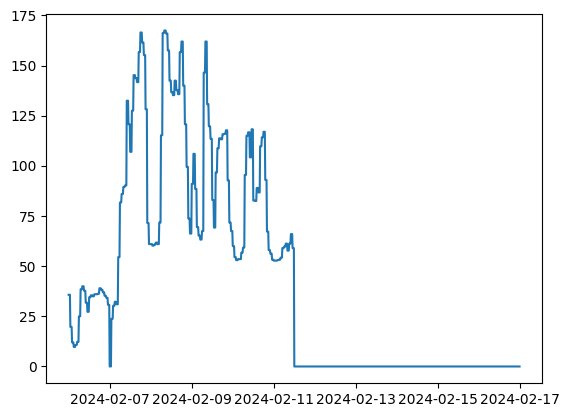

In [1165]:
# start plotting

plt.plot(df_joined.index, df_joined["summe"])
plt.show()